In [7]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from numpy import linspace

matplotlib.rcParams['figure.dpi'] = 200

In [14]:
def fn(lat, Q):
    return "/home/alir/data/europa_constant_bottom_heat_flux_{:d}mW_2000days_lat{:d}_profiles.jld2".format(int(1000*Q), lat)

In [12]:
lats = linspace(0, 90, 7, dtype=np.int)
Qs = [0.05, 0.1, 0.5, 1]

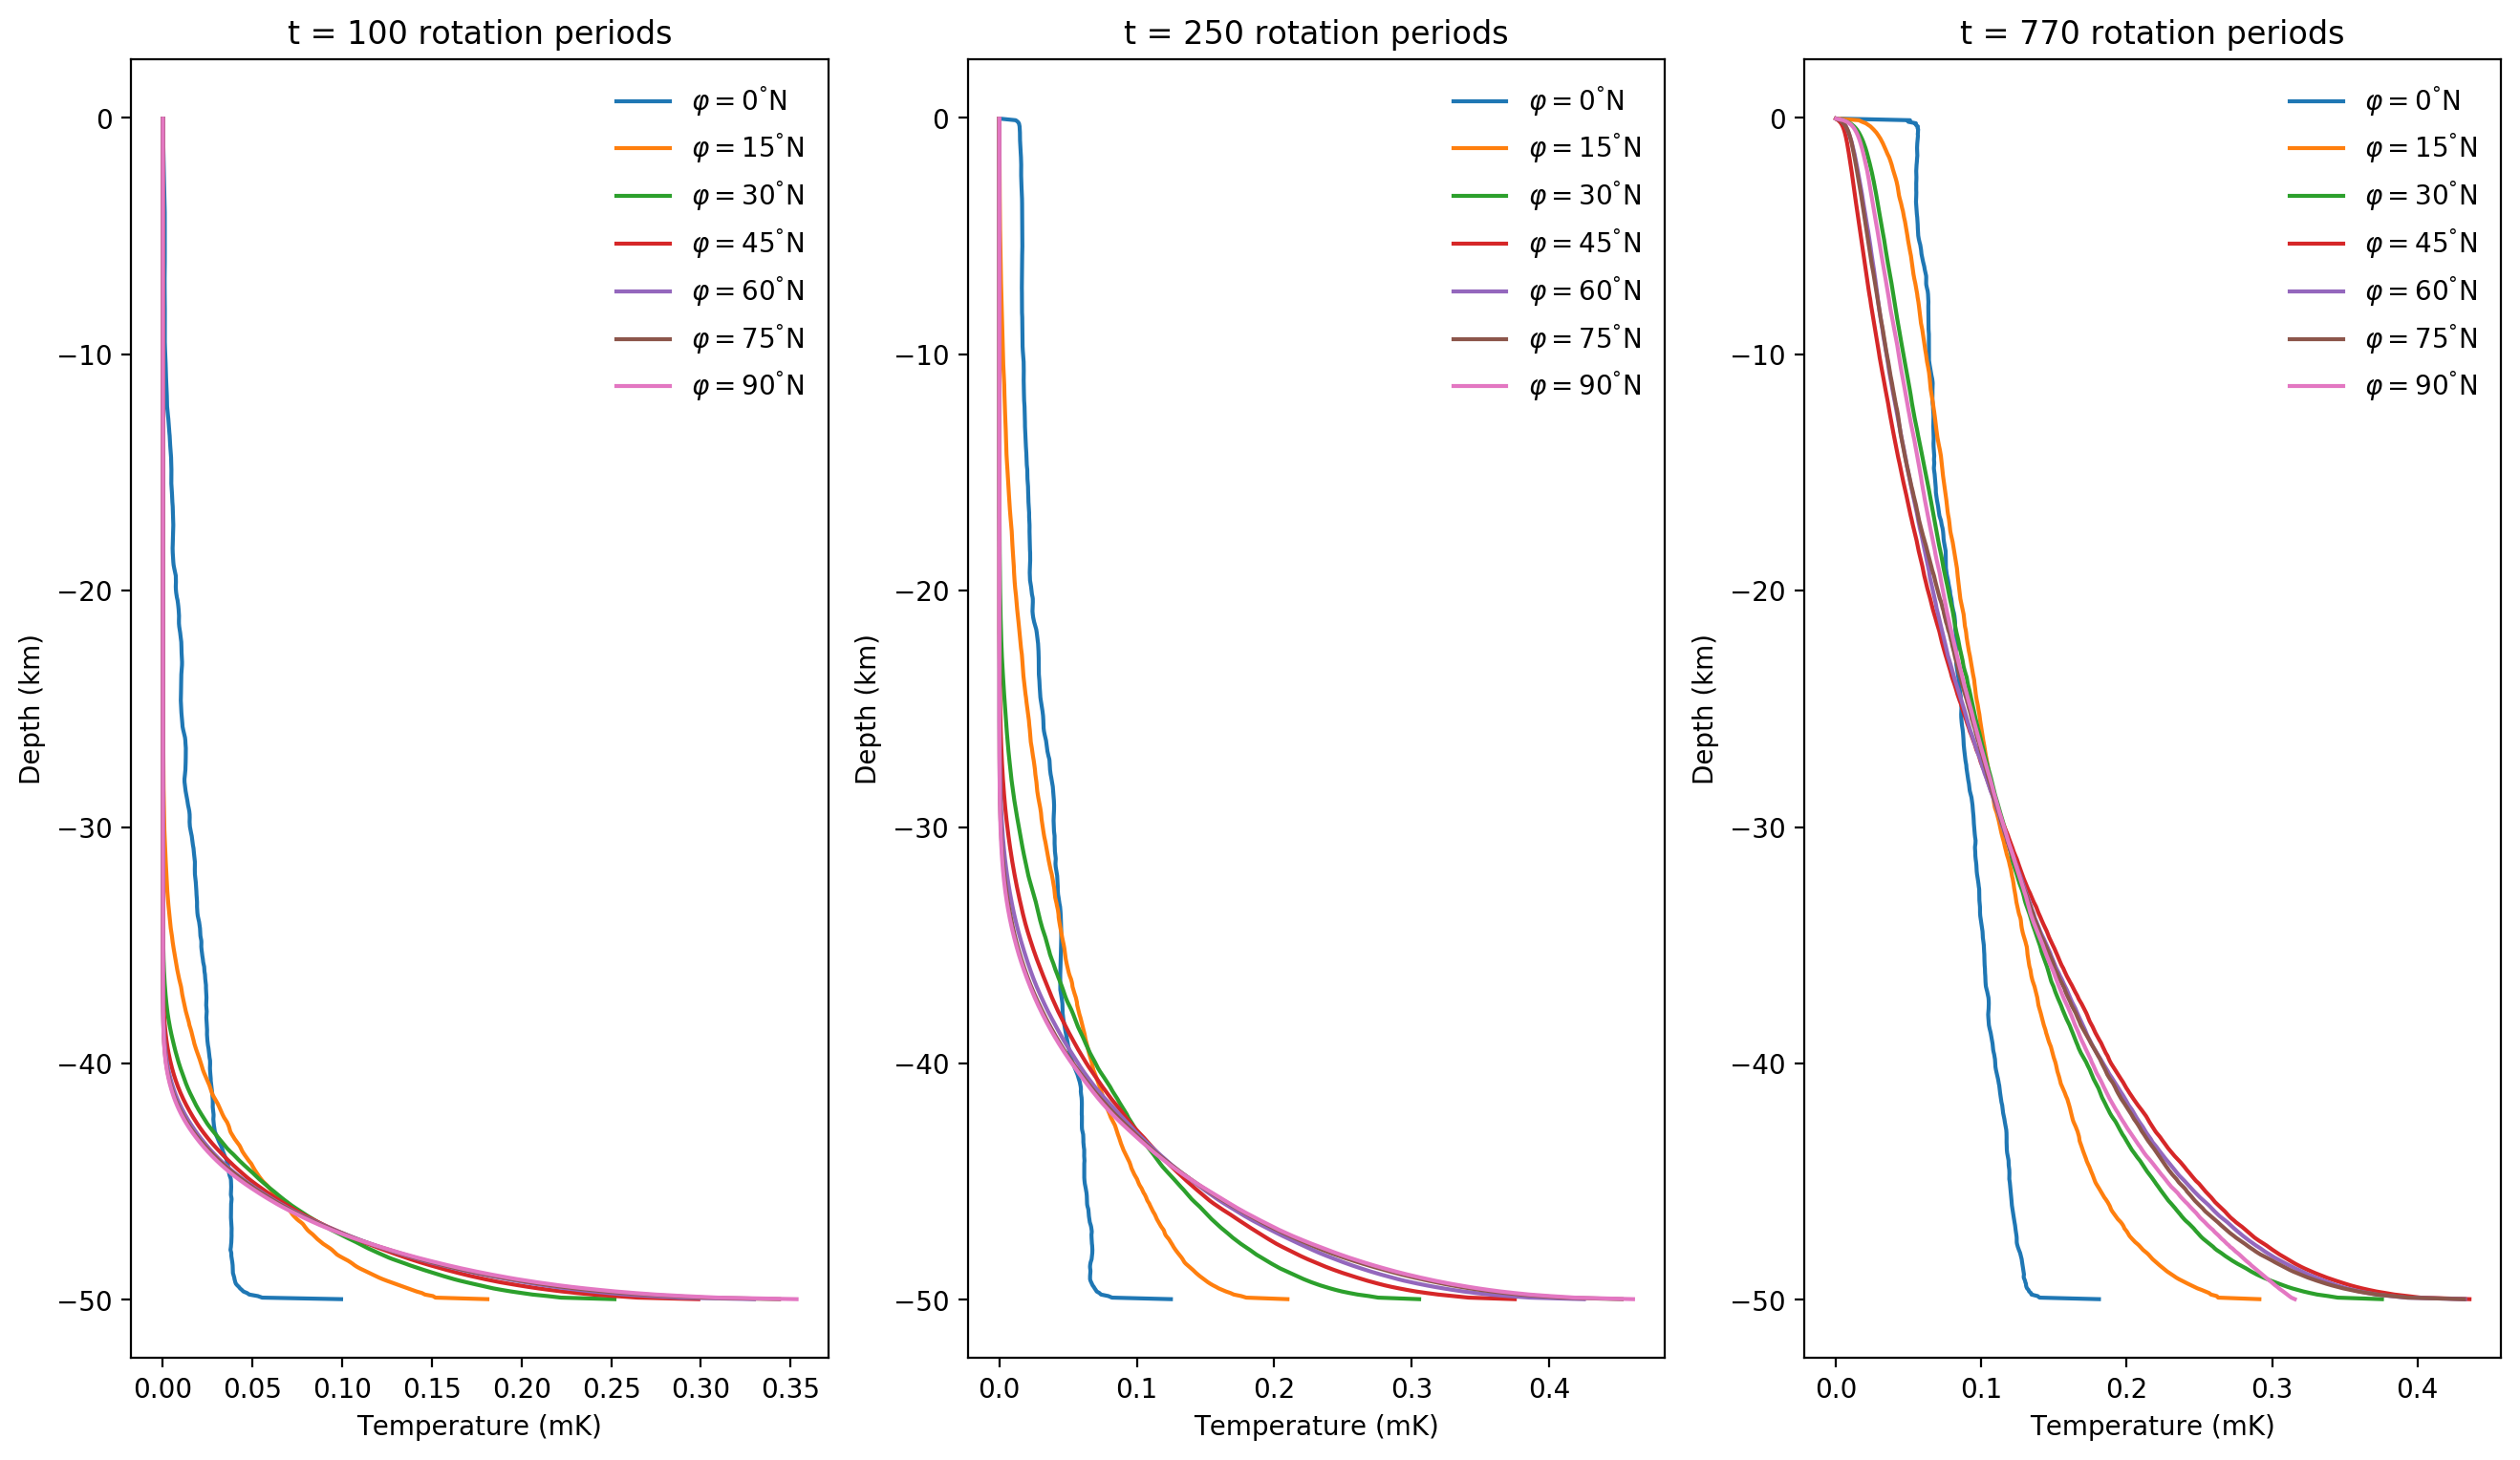

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

for lat in lats:
    profs = h5py.File(fn(lat, 0.1))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[1000]
    t = profs["timeseries/t/" + str(i)][()]
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax1.plot(1000*T, z / 1000, label=r"$\varphi={:d}^\degree$N".format(lat))
    ax1.set_xlabel("Temperature (mK)")
    ax1.set_ylabel("Depth (km)")
    ax1.set_title("t = 100 rotation periods")
    ax1.legend(frameon=False)
    
for lat in lats:
    profs = h5py.File(fn(lat, 0.1))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[2500]
    t = profs["timeseries/t/" + str(i)][()]
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax2.plot(1000*T, z / 1000, label=r"$\varphi={:d}^\degree$N".format(lat))
    ax2.set_xlabel("Temperature (mK)")
    ax2.set_ylabel("Depth (km)")
    ax2.set_title("t = 250 rotation periods")
    ax2.legend(frameon=False)
    
for lat in lats:
    profs = h5py.File(fn(lat, 0.1))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[7700]
    t = profs["timeseries/t/" + str(i)][()]
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax3.plot(1000*T, z / 1000, label=r"$\varphi={:d}^\degree$N".format(lat))
    ax3.set_xlabel("Temperature (mK)")
    ax3.set_ylabel("Depth (km)")
    ax3.set_title("t = 770 rotation periods")
    ax3.legend(frameon=False)

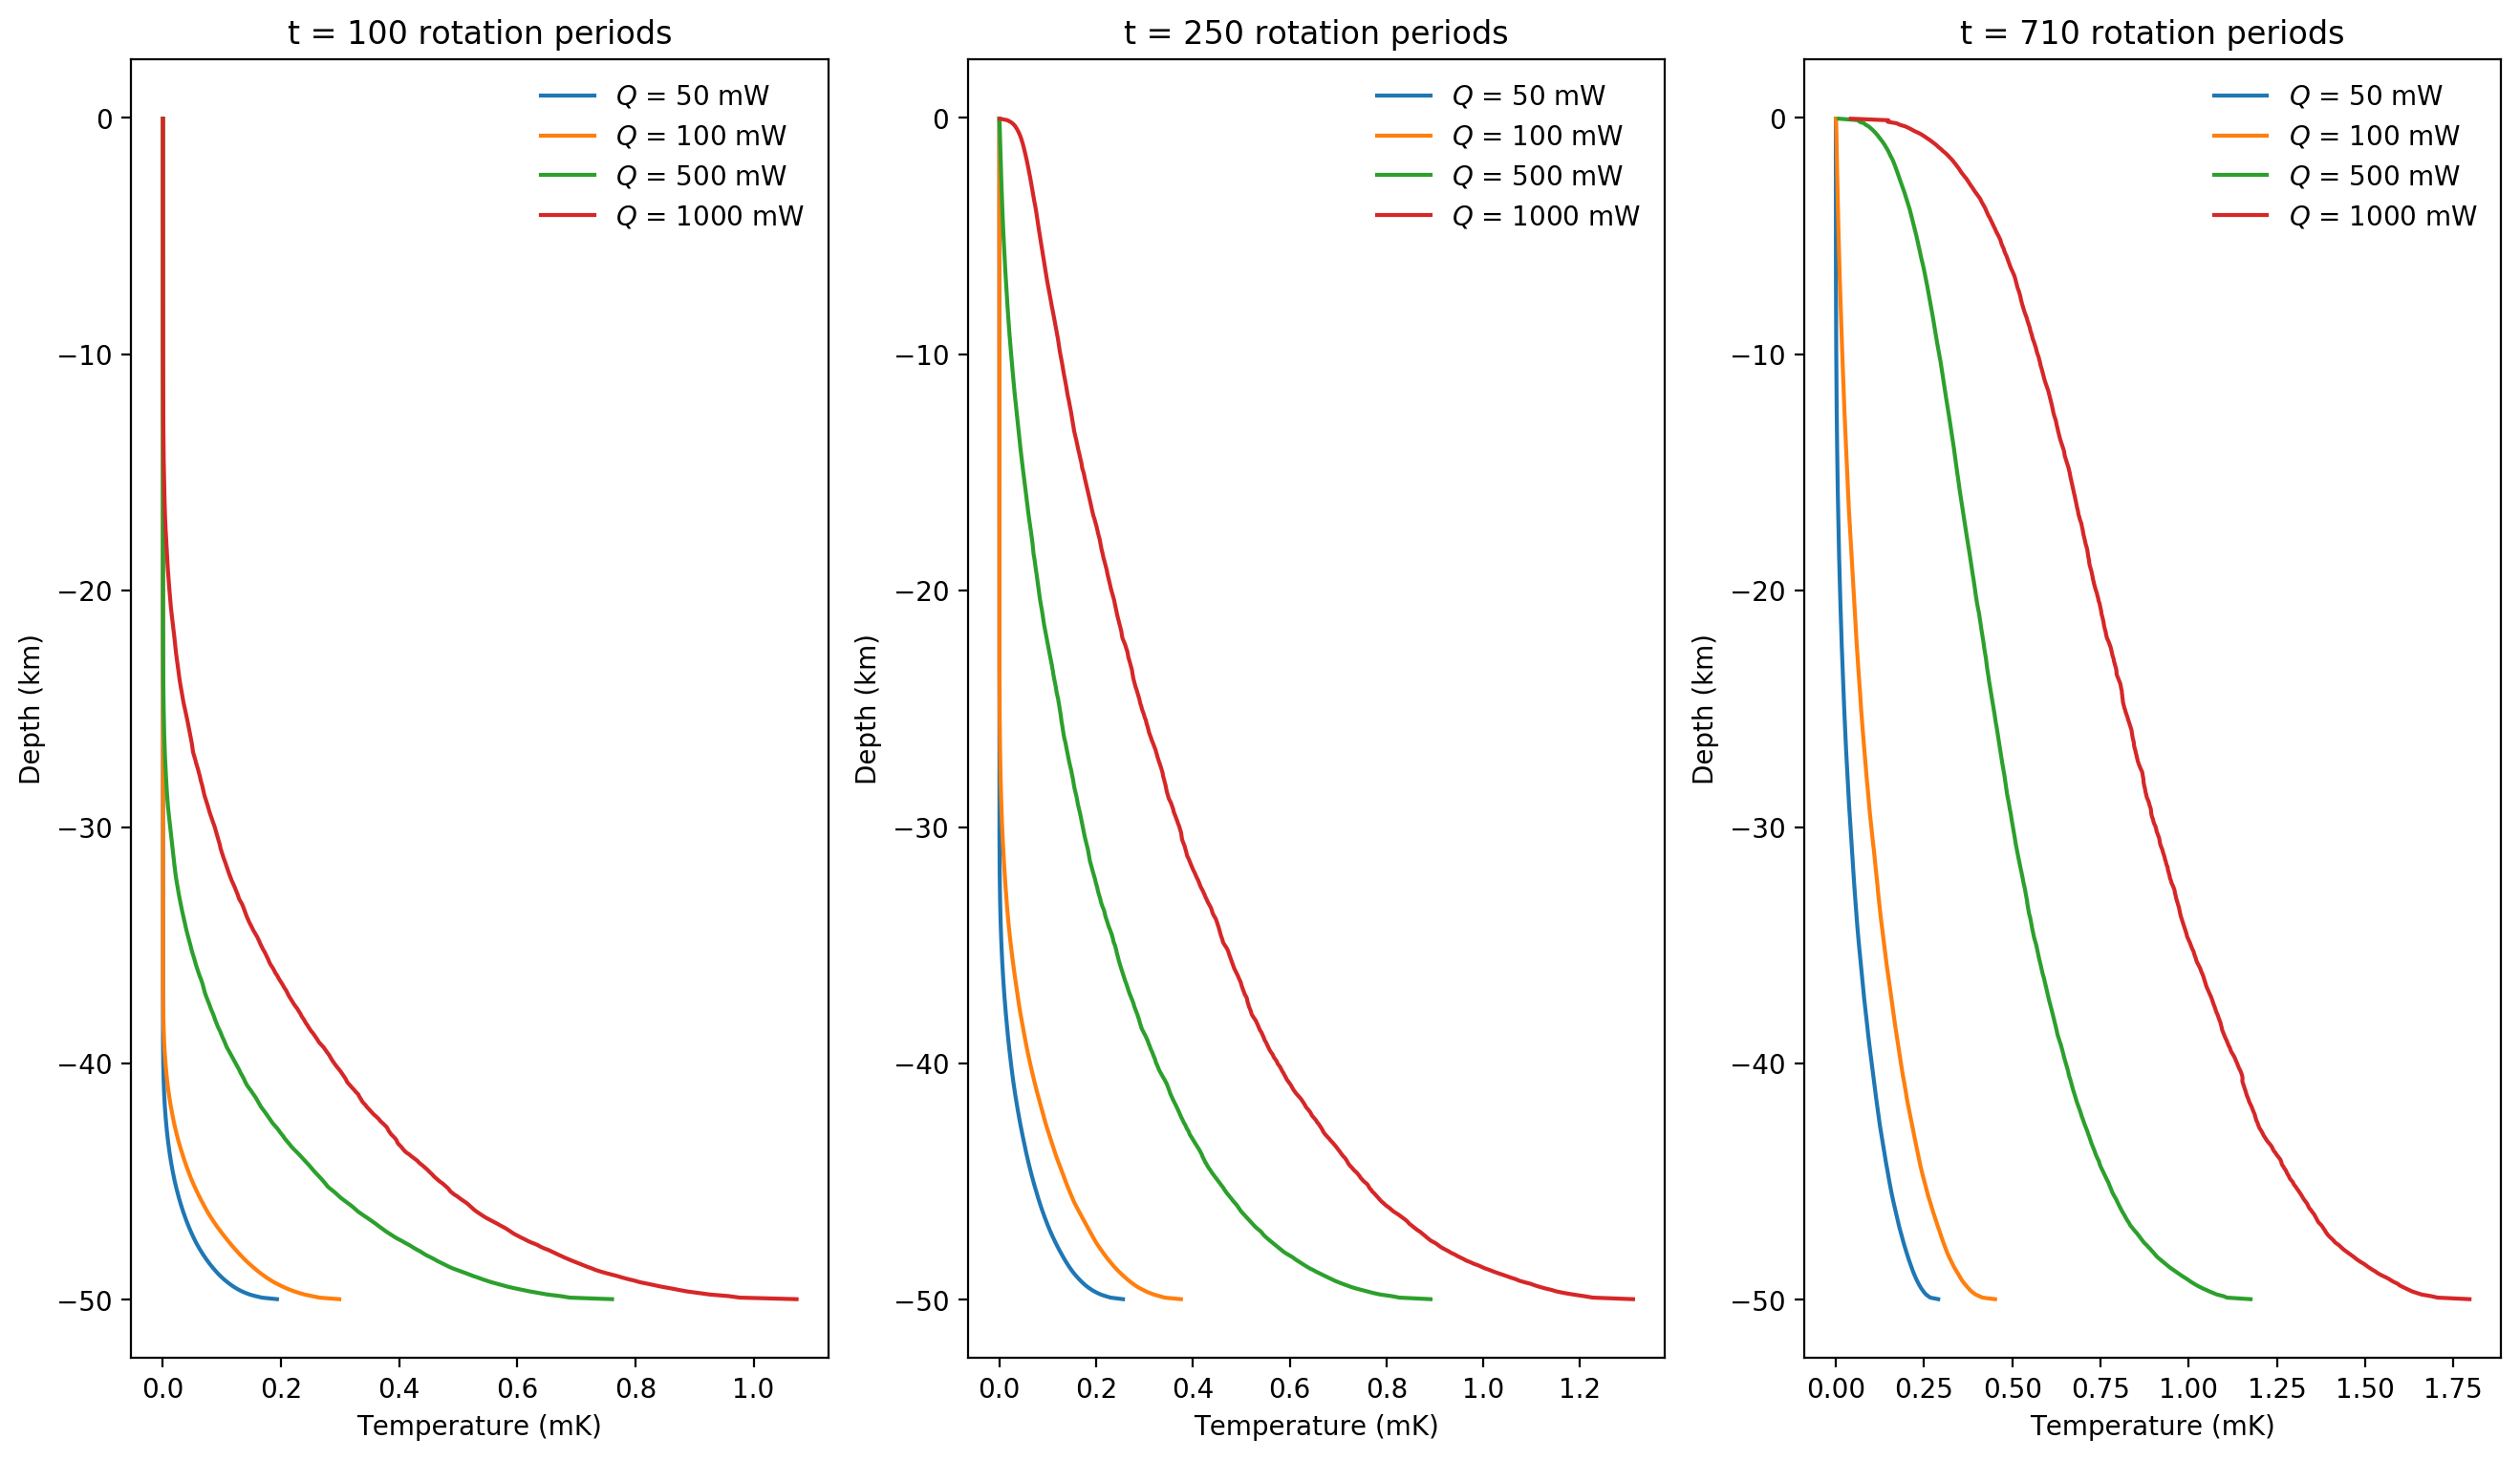

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

for Q in Qs:
    profs = h5py.File(fn(45, Q))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[1000]
    t = profs["timeseries/t/" + str(i)][()]
    
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax1.plot(1000*T, z / 1000, label=r"$Q$ = {:.0f} mW".format(1000*Q))
    ax1.set_xlabel("Temperature (mK)")
    ax1.set_ylabel("Depth (km)")
    ax1.set_title("t = 100 rotation periods")
    ax1.legend(frameon=False)
    
for Q in Qs:
    profs = h5py.File(fn(45, Q))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[2500]
    t = profs["timeseries/t/" + str(i)][()]
    
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax2.plot(1000*T, z / 1000, label=r"$Q$ = {:.0f} mW".format(1000*Q))
    ax2.set_xlabel("Temperature (mK)")
    ax2.set_ylabel("Depth (km)")
    ax2.set_title("t = 250 rotation periods")
    ax2.legend(frameon=False)
    
for Q in Qs:
    profs = h5py.File(fn(45, Q))
    Is = sorted(list(map(int, list(profs["timeseries/t"].keys()))))
    
    rp = profs["parameters/rotation_period"][()]
    
    i = Is[7100]
    t = profs["timeseries/t/" + str(i)][()]
    
    x, y, z = profs["grid/xC"][()], profs["grid/yC"][()], profs["grid/zC"][()]
    T = profs["timeseries/T/" + str(i)][()][1:-1, 0, 0]

    ax3.plot(1000*T, z / 1000, label=r"$Q$ = {:.0f} mW".format(1000*Q))
    ax3.set_xlabel("Temperature (mK)")
    ax3.set_ylabel("Depth (km)")
    ax3.set_title("t = 710 rotation periods")
    ax3.legend(frameon=False)

In [39]:
def find_nearest_idx(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx